# Lesson 09: 내장함수, lambda, 데코레이터

최규빈  
2023-07-25

# 내장함수

`-` sum,min,max

In [5]:
sum([1,2,3]),min([1,2,3]),max([1,2,3])

In [9]:
min('abc'),max('abc')

`-` eval:

In [13]:
eval("(1-1)*6")

In [14]:
eval("'a'+'b'")

In [15]:
eval("[1,2,3]+[4]")

In [38]:
import numpy as np
eval("np.array([1,2,3])+1")

`-` sorted

In [20]:
sorted([1,2,4,3])

In [25]:
a=[1,2,4,3]
a.sort()
a

In [21]:
sorted([1,2,4,3],reverse=True)

`-` all, any

In [26]:
all([True,False,True,False])

In [28]:
any([True,False,True,False])

# lambda

`-` 예제1: 람다표현식(lambda expression)자체가 하나의 오브젝트임

In [2]:
lambda x: (x-2)**2 ### lambda x: (x-2)**2 가 실행되는 순간 메모리상에 함수 오브젝트가 저장됨 

-   “lambda x: (x-2)\*\*2” 는 $lambda(x)=(x-2)^2$의 느낌으로 기억하면
    쉬움

**(사용방법)**

In [192]:
(lambda x: (x-2)**2)(2) # 입력2 -> 출력 (2-2)^2 =0 

In [10]:
(lambda x: (x-2)**2)(5) # 입력5 -> 출력 (5-2)^2 =9

In [11]:
(lambda x: (x-2)**2)(6) # 입력6 -> 출력 (6-2)^2 =16

In [12]:
(lambda x: (x-2)**2)(-2) # 입력-2 -> 출력 (-2-2)^2 =16

**Quiz**

$f(x)=\sqrt{x}$ 를 수행하는 함수를 lambda를 이용하여 구성하라.

`-` 예제2: 람다표현식에 이름을 줄 수 있음.

In [196]:
f = lambda x: (x-2)**2

In [197]:
f(2),f(4),f(6),f(-2)

위의 코드는 아래와 같다.

In [198]:
def f(x):
    return (x-2)**2
f(2),f(4),f(6),f(-2)

`-` 예제3: 조건부 출력

In [32]:
f = lambda x,y: x if x>y else y # x,y가 입력 -> x>y 일때만 x를 리턴하고 그렇지않으면 y를 리턴 = 큰값을 리턴하라는 소리임 

In [33]:
f(1,20)

**Quiz**

임의의 알파벳 문자열을 입력으로 하고, 알파벳이 대문자이면 “대문자
입니다”를 출력하고 소문자이면 “소문자 입니다”를 출력하는 함수를
구성하라.

(힌트) 아래코드 이용

In [54]:
'a'.isupper()

`-` 예제4: 람다표현식들의 리스트

In [67]:
fl = [lambda x: x, lambda x: x**2, lambda x: x**3]

In [102]:
for f in fl: 
    print(f(2))

2
4
8

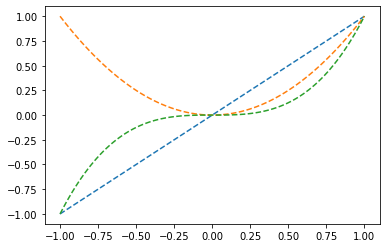

In [92]:
x = np.linspace(-1,1,100)
for f in fl:
    plt.plot(x,f(x),'--') 

`-` 예제5: 람다표현식들의 딕셔너리

In [115]:
fd = {'f1':lambda x: x, 'f2':lambda x: x**2, 'f3':lambda x: x**3}
fd

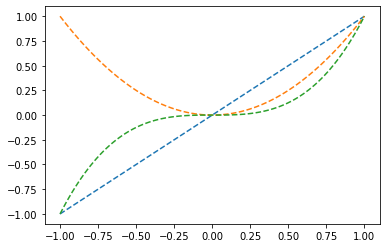

In [121]:
for k in fd:
    plt.plot(x,fd[k](x),'--')

`-` 예제6: 람다표현식을 리턴하는 함수 (함수를 리턴하는 함수)

(예비학습) 함수 $g(x)$가 정의되어 있을때 $\frac{d}{dx}g(x)$의 값을
계산해보기

In [132]:
g = lambda x: x**2 

In [133]:
gg = lambda x : (g(x+0.001)-g(x))/0.001

In [134]:
gg(4)

(목표) 도함수를 구해주는 `derivate` 함수를 정의하자. 이 함수는 임의의
함수 g를 입력으로 받으면, g의 도함수(gg)가 리턴되는 기능을 가진다.

In [135]:
def derivate(g):
    return lambda x : (g(x+0.001)-g(x))/0.001

(사용1)

In [129]:
gg = derivate(g) 

In [212]:
x = np.linspace(0,6.28,1000) 

In [1]:
plt.plot(x,g(x),label=r'$g(x)=sin(x)$')
plt.plot(x,gg(x),label=r'$\frac{d}{dx}g(x)=cos(x)$')
plt.legend(fontsize=15)

(사용2)

In [146]:
g0 = lambda x: (1/6)*x**3
g1 = derivate(g0) # (1/2)x^2 
g2 = derivate(g1) # x 

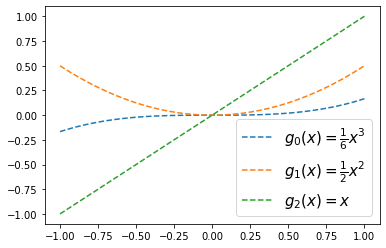

In [147]:
x = np.linspace(-1,1,100)
plt.plot(x,g0(x),'--',label=r'$g_0(x)=\frac{1}{6}x^3$')
plt.plot(x,g1(x),'--',label=r'$g_1(x)=\frac{1}{2}x^2$')
plt.plot(x,g2(x),'--',label=r'$g_2(x)=x$')
plt.legend(fontsize=15)

`-` 예제7: 예제6의 다른표현

In [148]:
derivate = lambda g: lambda x : (g(x+0.001)-g(x))/0.001

(사용1)

In [149]:
g = lambda x: np.sin(x) 

In [150]:
gg = derivate(g) 

In [151]:
x = np.linspace(0,6.28,1000) 

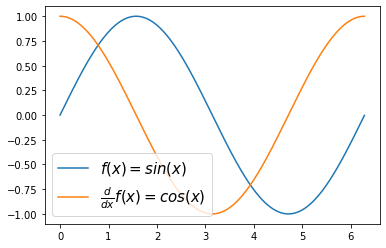

In [152]:
plt.plot(x,g(x),label=r'$f(x)=sin(x)$')
plt.plot(x,gg(x),label=r'$\frac{d}{dx}f(x)=cos(x)$')
plt.legend(fontsize=15)

(사용2)

In [153]:
g0 = lambda x: (1/6)*x**3
g1 = derivate(g0) # (1/2)x^2 
g2 = derivate(g1) # x 

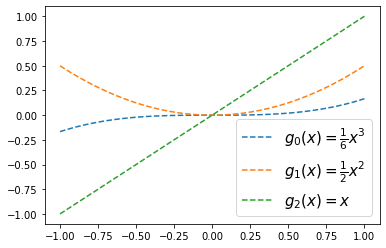

In [154]:
x = np.linspace(-1,1,100)
plt.plot(x,g0(x),'--',label=r'$g_0(x)=\frac{1}{6}x^3$')
plt.plot(x,g1(x),'--',label=r'$g_1(x)=\frac{1}{2}x^2$')
plt.plot(x,g2(x),'--',label=r'$g_2(x)=x$')
plt.legend(fontsize=15)

# 데코레이터

`-` 예제1: 함수를 모듈화

In [24]:
derivate = lambda g: lambda x : (g(x+0.001)-g(x))/0.001

In [25]:
def f(x):
    return x**2
f(3)

In [26]:
@derivate
def f(x):
    return x**2
f(3)

`-` 예제2: